<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Денис, рад приветствовать ВАС! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху Ваших знаний - свой опыт, что бы Вы могли использовать его для Вашего дальнейшего успеха)
<br>
</font>
<br>

</font>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [276]:
import pandas as pd 

common_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
common_data.info()
common_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

- Общее кол-во строк:  23699, Общее кол-во столбцов 22
- Имеются пропуски в важных для целей анализа столбцах
- Имеется нестандартизированное заполенение столбца locality_name

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
лаконично и по делу)
<br>
</font>

### Шаг 2. Предобработка данных

In [277]:
# Изменение названий в locality_name
common_data['locality_name'] = common_data['locality_name'].fillna('Unknown')  # Заполнил пропуски 

def new_loc_name(data):
    for a,b in enumerate(data['locality_name']):
        if b.isupper():
            new_world = data['locality_name'][a:]
            data['locality_name'] = new_world
            break
    return data['locality_name']
common_data['locality_name'] = common_data.apply(new_loc_name, axis = 1)



#---------------------------------------- Устранение пропусков в ceiling_height
# Создаю словарь для замены
higth_loc = common_data.pivot_table(index = 'locality_name', values = 'ceiling_height', aggfunc = ['median', 'count'])
higth_loc.columns = ['median', 'count']
higth_loc = higth_loc.query('count > 5')
higth_loc.drop('Unknown', inplace = True)
list_higth_loc = list(higth_loc.index)
hight_dic = higth_loc['median'].to_dict()
hight_dic



#Медиана до замены на -1
common_median_hight = common_data['ceiling_height'].median()
common_data['ceiling_height'].fillna(-1, inplace = True)

#Основная замена 
def fill_hight(data):
    if data['ceiling_height'] == -1:
        if data['locality_name'] in list_higth_loc:
            return hight_dic[data['locality_name']]
        else:
            return common_median_hight
    return data['ceiling_height']



common_data['ceiling_height'] = common_data.apply(fill_hight, axis = 1)
common_data['ceiling_height'].fillna(common_median_hight, inplace = True)


#---------------------------------------- Устранение пропусков в living_area

#столбец соотношения жилой и общей площади 
common_data['living/total_ratio'] = common_data['living_area'] / common_data['total_area'] 

#словарь 
lt_ratio_rooms = common_data.pivot_table( index = 'rooms', values = 'living/total_ratio', aggfunc = ['median', 'count'])
lt_ratio_rooms.columns = ['median', 'count']
lt_ratio_rooms = lt_ratio_rooms.query('count > 5')
list_lt_ratio_rooms = lt_ratio_rooms.index.to_list()
lt_ratio_rooms_dic = lt_ratio_rooms['median'].to_dict()


median_lt_ratio = common_data['living/total_ratio'].median()
common_data['living_area'].fillna(-1, inplace = True) 

# Основная замена       
def fill_living_area(data):
    if data['living_area'] == -1:
        if data['rooms'] in list_lt_ratio_rooms:
            return lt_ratio_rooms_dic[data['rooms']] * data['total_area']
        else:
            return median_lt_ratio * data['total_area']
    return data['living_area']

common_data['living_area'] = common_data.apply(fill_living_area, axis = 1)
common_data['living_area'].fillna(median_lt_ratio * common_data['total_area'], inplace = True)

#---------------------------------------- Устранение пропусков в kitchen_area
#словарь для замены
common_data['kitchen/total_ratio'] = common_data['kitchen_area'] / common_data['total_area'] 
tk_ratio_rooms = common_data.pivot_table( index = 'rooms', values = 'kitchen/total_ratio', aggfunc = ['median','count'])
tk_ratio_rooms.columns = ['median', 'count']
tk_ratio_rooms =tk_ratio_rooms.query('count >= 5')
list_tk_ratio_rooms = tk_ratio_rooms.index.tolist()
tk_ratio_rooms_dic = tk_ratio_rooms['median'].to_dict()

# Медиана до замены 
median_tk_ratio = common_data['kitchen/total_ratio'].median()
common_data['kitchen_area'].fillna(-1, inplace = True) 

#основная замена
def fill_kitchen_area(data):
    if data['kitchen_area'] == -1:
        if data['rooms'] in list_tk_ratio_rooms:
            return tk_ratio_rooms_dic[data['rooms']] * data['total_area']
        else:
            return median_tk_ratio * data['total_area']
    return data['kitchen_area']

common_data['kitchen_area'] = common_data.apply(fill_kitchen_area, axis = 1)
common_data['kitchen_area'].fillna(median_tk_ratio * common_data['total_area'], inplace = True)

#----------------------------------------замена пропусков в других столбцах
common_data['balcony'].fillna(0, inplace = True)
common_data['floors_total'].fillna(-1, inplace = True)
common_data['cityCenters_nearest'].fillna(-1, inplace = True)
common_data['is_apartment'].fillna(0, inplace = True)



#----------------------------------------Изменение типов данных
common_data['last_price'] = common_data['last_price'].astype('int')
common_data['total_area'] = common_data['total_area'].astype('int')
common_data['floors_total'] = common_data['floors_total'].astype('int')
common_data['living_area'] = common_data['living_area'].astype('int')
common_data['kitchen_area'] = common_data['kitchen_area'].astype('int')
common_data['is_apartment'] = common_data['is_apartment'].astype('bool')
common_data['cityCenters_nearest'] = common_data['cityCenters_nearest'].astype('int')


common_data['first_day_exposition'] = pd.to_datetime(common_data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


### Вывод

Была произведена предобработка данных.
-  Были изменены данные в стобце locality_name. Основная проблема заключалось в том, что в некоторых случая указвалася тип населенного пункта, в других нет, что приводило к невозмоности правильно сгруппировать данные при дальнейшем анализе. Данные пропуски могли произойти из-за недостаточно понятной анекты для заполнителя.
-  Были заполнены пропуски в столбце ceiling_height. Данные пропуски былии заменены на медианы относительно каждого насленного пункта,отталкиваясь от идеи, что во многих городах преобладает типовая застройка. Однако, в некоторых случаях, число наблюдений было очень небольшое (до 5) и могло не отражать реальных условий. В таких случаях и в случаях с неопределенной локацией пропуски были заменены на медиану по всей выборки, чтобы минимизировать искажение данных.
-  Были заменены пропуски в столбцах living_area и kitchen_area. Даныне пропуски заполнялись относительно общей площади с учетом количества комнат, основываясь на идее, что в целом на одну квартиру приходися одна кухня и ее доля в общей площади обратна количиству комнат. Обратная ситуация с жилой площадью.
-  Также были заполнены пропуски в столбцах balcony, is_apartment, cityCenters_nearest, floors_total. Первые были заменены на 0 исходя из логики, что если человек не указал кол-во болконов их нет и если человек не указал, что продоваемый обьект - апартамент, значит он таковым не является. Поседние два столбца были заполнены на -1 так как: а) С уверенностью востоновить данные не получиться б) количество пропущенных значений не большое -> их исключение не приведет к сильным потерям информации. ( в случае с cityCenters_nearest общее кол-во nan было большое, но в выборке по Санкт-Петербургу их очень мало, что не помешает анализу)
- Пропуски в других столбцах не заполнялись, так как столцы не нужны для дальнейшего анализа
- Были изменены типы данных для более комфортного анализа в дальнейшем и сохранности памяти. 
- Изменен тип first_day_exposition для дальнейшего анализа


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Предпосылки понятны)<br>
Удобнее проверять, когда после каждого нового действия следует результат и анализ.<br>
Есть просьба к Вам, в следующий раз формировать больше блоков, чтобы не всё в одном)). Спасибо.
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='orange'>
ПО locality_name<br>
По этому столбцу, есть ещё одна проблемка: на одну и ту же локацию - несколько разных наименований<br>
(деревня кудрово, посёлок кудрово, прочто кудрово),<br>
В общем-то для дальнейших агрегированных вычислений - это может вносить не точность в результат!!!
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='orange'>
ПО БАЛКОНАМ:<br>
ОК, заменили на 0,т.к. предположили, что люди не заполняли анкету по этому пункту<br>
потому что у них нет балкона.<br>
А если сделать другое предположение:<br>
Балконы есть, просто люди забыли проставить в анкетах. Тогда надо чем-то заполгнять пропуски. Например, проанализировав данные на предмет "номер этажа - есть балкон/нет балкона" и если вероятность наличия балкона на каком-либо этаже - высока, то и основную выборку маркировали "1"<br><br>
Это пример того, как изначальная предпосылка может менять весь анализ)))<br>
Т.е. предпосылка, на которой аналитик строит фундамент своего проекта - очень важная и ответсвенная история))))<br>
Вообще, "Аналитик здесь главный", как шутят некоторые.<br>
И можно согласиться с этим. Только и ответсвенность от этого также высокая!!!<br>
Например, если взять проетк по медицине. Там от предпосылок зависит результат. А от результата может зависеть жизнь и здоровье многих людей)
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='orange'>
Пару моментов на обсуждение:<br>
1) С медианами - верная идея. суммарно, это меньшая ошибка <br>
(ведь когда подставляем какие-то значения, то всегда тем самым сами уже вносим искажения в результат)<br>
Есть один случай, медиана однозначно наврёт. Это когда в данных есть тренд<br>
Это больше подходит к временным рядам, но и сейчас уже можно намотать на ус))<br>
2) А вообще, всегда ли надо бороться с пропусками?<br>
Тут критерий - здравый смысл, относительно конечной бизнес-задачи.<br>
Например, есть пропуски в данных, но не понятно чем их заполнить. А если удалить пропущенные строки, то
может удалить ценная инфо по другим столбцам.<br>
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
По остальным - понятно. Интересные шаги по коду)
<br>
</font>

### Шаг 3. Посчитайте и добавьте в таблицу

In [278]:
# цена квадратного метра 
common_data['sqm_price'] = common_data['last_price'] / common_data['total_area']
common_data['living/total_ratio'] = common_data['living_area'] / common_data['total_area'] 
common_data['kitchen/total_ratio'] = common_data['kitchen_area'] / common_data['total_area'] 


def day_of_week(data):
    return data['first_day_exposition'].dayofweek

def month(data):
    return data['first_day_exposition'].month

def year(data):
    return data['first_day_exposition'].year

common_data['day'] = common_data.apply(day_of_week, axis = 1 )
common_data['month'] = common_data.apply(month, axis = 1 )
common_data['year'] = common_data.apply(year, axis = 1 )

common_data = common_data.query('floors_total  != -1')
def floor_сategory(data):
    if data['floor'] == 1:
        return "первый"
    elif data['floor'] < data['floors_total'] and data['floor'] > 1:
        return 'другой'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    return 'Unknow'

common_data['floor_category'] = common_data.apply(floor_сategory, axis = 1 )

common_data.groupby('floor_category')['last_price'].count()

floor_category
другой       17363
первый        2914
последний     3336
Name: last_price, dtype: int64

### Вывод


- В таблицу был добавлен столбец с ценой за квадратный метр ( sqm_price )
- В талице была произведенена категоризация относительно этажа (первый,последний,другой). Для это цели были исключены строки без floors_total. Кол-во отфильтрованных строк очень маленькое, что не повлияет на дальнейший анализ.
- В таблицу были добавлены столбцы со значениями дня недели, месяца и года. ( столбцы day, month, year) 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
тут понятно, ок. <br>
Не большой комментарий: если принято решение удалять строки - то лучше оцифровывать масштаб бедствия.<br>
Например, какой процент данных пришлось убить... Или % по категории "неизвестно"...
<br>
</font>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

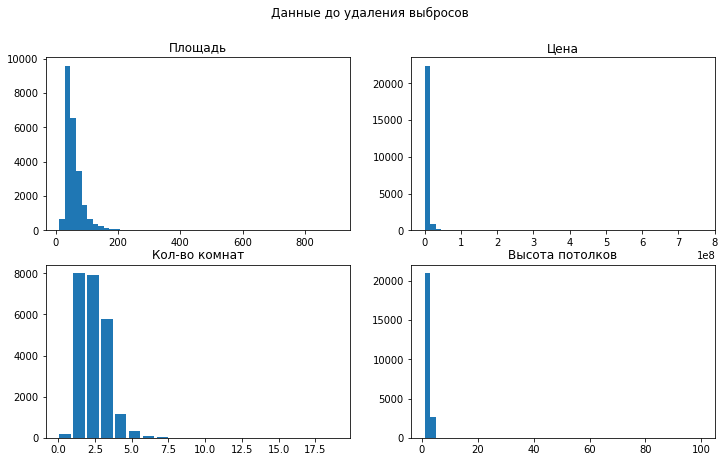

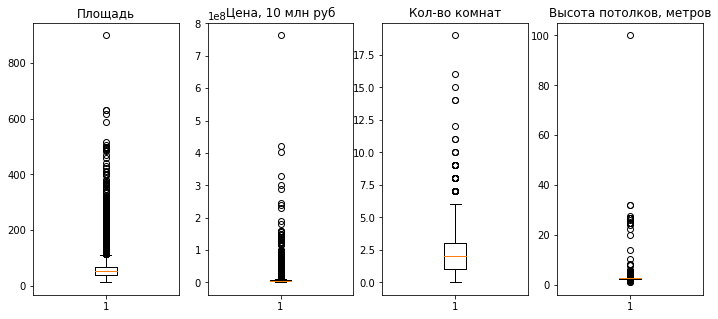

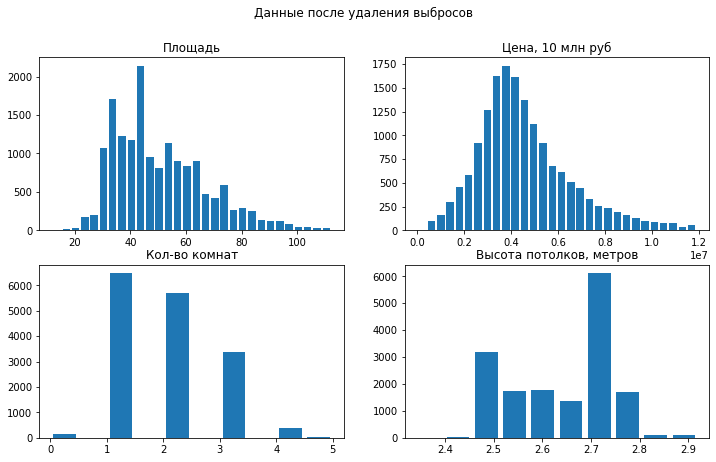

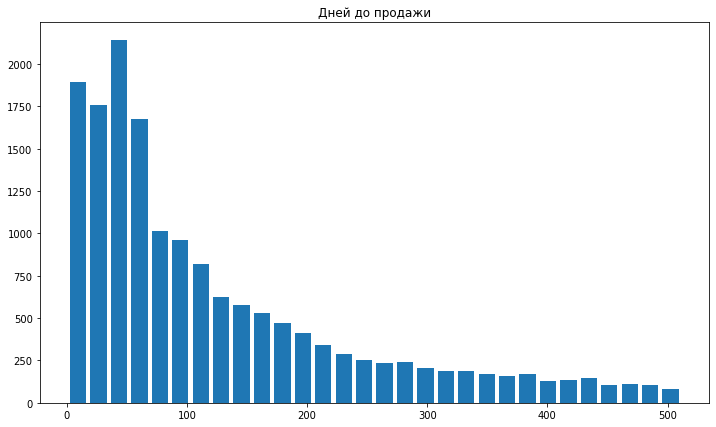

count    16134.000000
mean       123.298810
std        118.595947
min          1.000000
25%         39.000000
50%         78.000000
75%        174.000000
max        511.000000
Name: days_exposition, dtype: float64

In [279]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_hist = plt.figure(figsize = (12,7))
fig_hist.suptitle('Данные до удаления выбросов')
plt.subplot(2,2,1)
plt.title('Площадь')
plt.hist(common_data['total_area'], bins = 50)

plt.subplot(2,2,2)
plt.title('Цена')
plt.hist(common_data['last_price'], bins = 50)

plt.subplot(2,2,3)
plt.title('Кол-во комнат')
plt.hist(common_data['rooms'], rwidth = 0.8, bins = 20)

plt.subplot(2,2,4)
plt.title('Высота потолков')
plt.hist(common_data['ceiling_height'], bins = 50)

plt.show(fig)


fig_box = plt.figure(figsize = (12,5))

plt.subplot(1,4,1)
plt.title('Площадь')
plt.boxplot(common_data['total_area'])

plt.subplot(1,4,2)
plt.title('Цена, 10 млн руб')
plt.boxplot(common_data['last_price'] )

plt.subplot(1,4,3)
plt.title('Кол-во комнат')
plt.boxplot(common_data['rooms'])

plt.subplot(1,4,4)
plt.title('Высота потолков, метров')
plt.boxplot(common_data['ceiling_height'])

plt.show(fig_box)


stat = common_data[['total_area','last_price','rooms','ceiling_height', 'days_exposition']].describe()

def outpoint(data, column, type):
    if type == 'high':
        point = data.loc['75%', column] + 1.5 * (data.loc['75%',column] - data.loc['25%', column])
        return point
    elif type == 'low':
        point = data.loc['25%', column] - 1.5 * (data.loc['75%',column] - data.loc['25%', column])
        return point

max_point_total_area = outpoint(stat, 'total_area', 'high')
min_point_total_area = outpoint(stat, 'total_area', 'low')

max_point_price = outpoint(stat, 'last_price', 'high')
min_point_price = outpoint(stat, 'last_price', 'low')

max_point_rooms = outpoint(stat, 'rooms', 'high')
min_point_rooms = outpoint(stat, 'rooms', 'low')

max_point_height = outpoint(stat, 'ceiling_height', 'high')
min_point_height = outpoint(stat, 'ceiling_height', 'low')

max_point_time = outpoint(stat, 'days_exposition', 'high')
min_point_time = outpoint(stat, 'days_exposition', 'low')

good_stat_data = common_data.query('@max_point_total_area > total_area > @min_point_total_area &' 
                                   '@max_point_price > last_price > @min_point_price &'
                                   '@max_point_rooms > rooms > @min_point_rooms &'
                                   '@max_point_height > ceiling_height > @min_point_height &'
                                   '@max_point_time > days_exposition > @min_point_time'
                                  )



fig_good = plt.figure(figsize = (12,7))
fig_good.suptitle('Данные после удаления выбросов')
plt.subplot(2,2,1)
plt.title('Площадь')
plt.hist(good_stat_data['total_area'], bins = 30, rwidth = 0.8)

plt.subplot(2,2,2)
plt.title('Цена, 10 млн руб')
plt.hist(good_stat_data['last_price'] , bins = 30, rwidth = 0.8)

plt.subplot(2,2,3)
plt.title('Кол-во комнат')
plt.hist(good_stat_data['rooms'], rwidth = 0.8)

plt.subplot(2,2,4)
plt.title('Высота потолков, метров')
plt.hist(good_stat_data['ceiling_height'], rwidth = 0.8)

plt.show(fig_good)


time_sell_fig1 = plt.figure(figsize = (12,7))
plt.title('Дней до продажи')
plt.hist(good_stat_data['days_exposition'], bins = 30 ,rwidth = 0.8)
plt.show(time_sell_fig1)
stat_time_to_sell = good_stat_data['days_exposition'].describe()
stat_time_to_sell

### Вывод

На данном этапе работы были выполнены следующие задачи:
- Проанализированы такие параметры как площадь, кол-во комнат, стоимость, высота потолков  (были построены гистограмммы и ящики с усами)
- Были удалены выбросы и построена новая база данных
- Был проведен анализ срока продажи и дургих параметров по исправленной выборке

**Первая задача.** При первичном анализе гистограмм было выявлено, что в выборке присутствуют выбросы ( потолки под 100 метров, площадь под 900 и тд). Данную гипотезу подтверждали и ящики с усами.

**Вторая задача.** На основе метода .describe() были определены верхние и нижние границы для каждого анализируемого параметра. Были удалены выбросы.**Выбросы нужно было удалить раньше** при заполнении пропусков, но этого не было сделано, чтобы следовать плану проекта,который расположен в самом низу, также, пропущенные значения заполнялись медианами, которые менее подвержены искажению выбросами.**Была построена новая база данных** ,однако,выбросов было достаточно много, так что новая база данных значительно меньше, но включает исключительно статистически нормальные данные. Также в эту базу данных не вошли наблюдения без срока продажи квартиры. Данный шаг был выполнен на основе той идеи, что для дальнейшего анализа требуются только **рыночные** цены. Если квартира выставлена на продажу и еще не куплена , то ее последняя цена - это цена продавца, что не есть рыночная. 

**Третья задача.Вывод.** Цены на квартиры имеют близкое к нормальному распределение. Абсолютно все изученные пареметры имеют ожидаемое распределение. Мы можем сделать некоторые выводы основываясь на полученных гистограммах:
- Большинство цен на квартиры в Ленобласти варьируются в пределах от 2 до 6 миллионов рублей.
- В большинстве квартир высота потолков составляет 2.7 метров.
- В продаже мало квартир с колличетсво комнат больше 3
- Можно считать что если квартира продается в более 200-250 дней, то она продается достаточно долго, если же квартира продается в первые 50 дней, то квартира продается быстро
- средний срок продажи квартиры - 123 дня, медиана  - 78


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
вдумчиво...здорово)<br>
По выводам - ОК получилось)<br>
Примерно так и есть (+-). Всё зависити от предпосылок работы с данными)<br>
    
Кстати, на графике гисторграммы можно ещё наблюдать двугорбость<br>
Это даёт сигнал к тому, что в генеральной выборке есть несколько однородных выборок (по числу горбов)
    
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='orange'>
ПО выбросам, пару моментов:<br>
1) беспощадная борьба с ними - это ОК.<br>
 Иногда, правда, случается, что совокупность выбросов образует некий свой кластер данных<br>
Аналитика которого также может быть ценнейшим материалом<br>

2) На примере высоты потолков:<br>
например высота 25. Высока вероятность, что это 2.5 И тогда легко можно сохранить эту строку.<br>
Т.е. Важно ещё смотреть на типы выбросов. Может кого и сможем приструнить))<br>
    
<br>
</font>

### Анализ факторов 

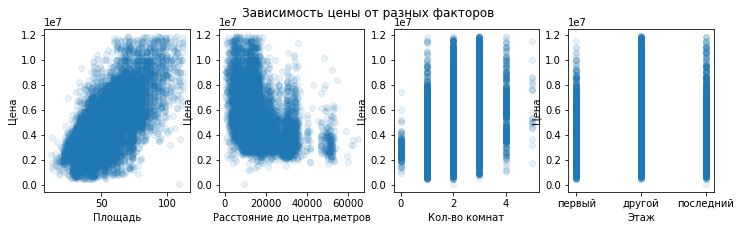

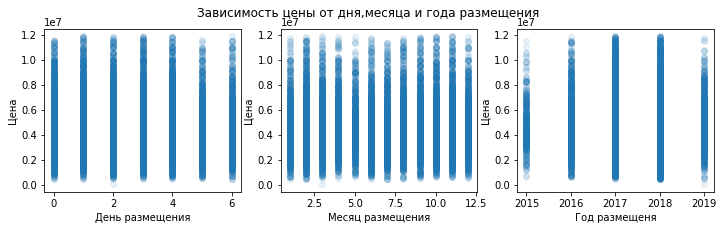

In [280]:
factors  = good_stat_data[['last_price','total_area','rooms','floor_category','cityCenters_nearest']]
factors_cener = factors.query('cityCenters_nearest != -1')

fig_factors = plt.figure(figsize = (12,3))
fig_factors.suptitle('Зависимость цены от разных факторов')
plt.subplot(1,4,1)
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.scatter(factors['total_area'], factors['last_price'], alpha = 0.1)


plt.subplot(1,4,2)
plt.xlabel('Расстояние до центра,метров')
plt.ylabel('Цена')
plt.scatter(factors_cener['cityCenters_nearest'], factors_cener['last_price'], alpha = 0.1)

plt.subplot(1,4,3)
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена')
plt.scatter(factors['rooms'], factors['last_price'], alpha = 0.1)


plt.subplot(1,4,4)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.scatter(factors['floor_category'], factors['last_price'], alpha = 0.1)


plt.show(fig_factors)


time_factors = good_stat_data[['last_price', 'day', 'month', 'year']]

fig_time_factors = plt.figure(figsize = (12,3))
fig_time_factors.suptitle('Зависимость цены от дня,месяца и года размещения')
plt.subplot(1,3,1)
plt.xlabel('День размещения')
plt.ylabel('Цена')
plt.scatter(time_factors['day'], time_factors['last_price'], alpha = 0.1)


plt.subplot(1,3,2)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')
plt.scatter(time_factors['month'], time_factors['last_price'], alpha = 0.1)

plt.subplot(1,3,3)
plt.xlabel('Год размещеня')
plt.ylabel('Цена')
plt.scatter(time_factors['year'], time_factors['last_price'], alpha = 0.1)




plt.show(fig_time_factors)


top10_location = good_stat_data.pivot_table(index = 'locality_name', values = 'sqm_price', aggfunc = 'mean')
top10_location.columns = ['mean_sqm_price']
top10_location.drop('Unknown', inplace = True)
top10_high_loc = top10_location.sort_values(by ='mean_sqm_price', ascending = False).head(10)
top10_low_loc = top10_location.sort_values(by ='mean_sqm_price', ascending = True).head(10)


### Вывод

На данном этапе работы были выполнены следующие задачи:
- Были построены графики зависимости цены от площади, расстояние до центра, кол-во комнат и этажа
- Были построены 3 диаграмы, которые показывали зависимоть цены от дня, месяца и года размещения

**Выводы**

**Первая задача.** Построенные графики показывают ожидаемый результат. Цена имеет в основном прямую зависимость от площади и кол-во комнат (это логично,ведь чем больше комнат, тем больше площадь). Также было доказано что, чем меньше расстояние до центра тем цена выше. Однако, график получился не самый ожидаймый, однако, это связано с тем, что не каждый центр ценится одинаково... центр какого нить поселка городского типа и центр Санкт - Петербурга имеются разную стоимость. Также анализ показал, что люди готовы платить меньше за первый и последний этаж (в общем).

**Вторая задача.** Очень показательным графиком являестся график цены от года. Анализируя данный график, можно сделать вывод о том , что цена на недвижимость в общем росла в период с 2015 по 2017, в период 2017 - 2018 оставалась стабильной, но в 2019 снова упала. При этом нижняя граница цен оставалась примерно неизменной. Ожидаемо, графики зависимости цены от дня и месяца не самые информативные. Однако, можно сказать, что в выходные размещается меньше квартир, нежели в другие дни. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Выводы - хорошо оформлены))<br> Приятно читать
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font><font color='green'>
Здесь предполагаось использование метода корреляций<br>
Для оценки меры связи между переменными<br>
Графика - ОК. Но есть ещё функция corr()<br>
Однако, для использования корреляций, надо чётко помнить следующие моменты:
<font color='orange'>
ВАЖНО!!! по использованию корреляций<br>
0) Этот инструмент - исключительно для данных в количественной шкале!!!!<br>
Показатель "год" - он тоже в количественной. Но как интерпретировать результат?<br>
Этот показатель, скорее всего, лучше интерпретировать как номинальная шкала (тут-то всего сколько годов - не боле 6-8)<br>
И тогда, чтобы, анализировать среднюю цены квартиры, например, удобно и более понятно использовать другу технику - сравнение групп (из темы "проверка гипотез" - в будущем у Вас будет).<br><br>
1) Наряду с силой связи, есть ещё характертеристика уровня значимости. Т.е. на сколько выявленной связи можно доверять (это теория р-уровня значений. Ещё будете изучать. Советую (если не очень пока знаете что это) попытать наставника по этому вопросу) <br>

2) Вы уже чётко видите разницу между средним и медианой (опираюсь на Ваш проект)<br>
Потому знаете, что данные имеют склонность быть нормальными и ненормальными (вот ёлки, всё как у людей:)))<br>
Этот факт важен при использовании расчётов коэффициента корреляции:<br>
Если данные нормальные - используют критерий Пирсона. если ненормальный - критерий Спирмена)<br>  
Есть ли последствия от "ложного" использования методов? Да - ложные управленческие выводы!!!!   <br><br>
 3) И ещё: корреляция - очень подвержена выбросам!!! (ну Вы с этим справились)   
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
С выводами - ок, понятно.
<br>
</font>

### Анализ квартир Санкт-Петербурга

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


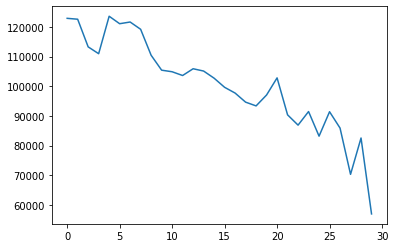

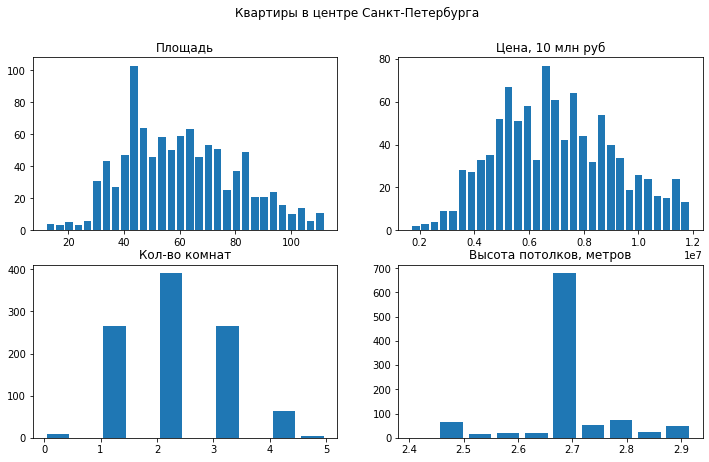

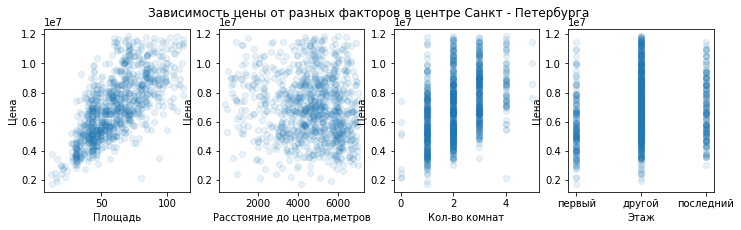

In [281]:
spb_flats = good_stat_data.query('locality_name == "Санкт-Петербург" & cityCenters_nearest != -1')
spb_flats.head(5)

def m_to_km(data):
    km = data['cityCenters_nearest'] / 1000
    return km 
spb_flats['km_to_center'] = spb_flats.apply(m_to_km, axis = 1)
spb_flats['km_to_center'] = spb_flats['km_to_center'].astype('int')

price_km = spb_flats.pivot_table( index = 'km_to_center', values = 'sqm_price', aggfunc = 'mean')
price_km.reset_index(inplace = True)
price_km
plt.plot(price_km['km_to_center'], price_km['sqm_price'])
plt.show()

spb_center = spb_flats.query('km_to_center <= 6')


fig_spb_center = plt.figure(figsize = (12,7))
fig_spb_center.suptitle('Квартиры в центре Санкт-Петербурга')
plt.subplot(2,2,1)
plt.title('Площадь')
plt.hist(spb_center['total_area'], bins = 30, rwidth = 0.8)

plt.subplot(2,2,2)
plt.title('Цена, 10 млн руб')
plt.hist(spb_center['last_price'] , bins = 30, rwidth = 0.8)

plt.subplot(2,2,3)
plt.title('Кол-во комнат')
plt.hist(spb_center['rooms'], rwidth = 0.8)

plt.subplot(2,2,4)
plt.title('Высота потолков, метров')
plt.hist(spb_center['ceiling_height'], rwidth = 0.8)

plt.show()

fig_spb_factors = plt.figure(figsize = (12,3))
fig_spb_factors.suptitle('Зависимость цены от разных факторов в центре Санкт - Петербурга')
plt.subplot(1,4,1)
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.scatter(spb_center['total_area'], spb_center['last_price'], alpha = 0.1)


plt.subplot(1,4,2)
plt.xlabel('Расстояние до центра,метров')
plt.ylabel('Цена')
plt.scatter(spb_center['cityCenters_nearest'], spb_center['last_price'], alpha = 0.1)

plt.subplot(1,4,3)
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена')
plt.scatter(spb_center['rooms'], spb_center['last_price'], alpha = 0.1)


plt.subplot(1,4,4)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.scatter(spb_center['floor_category'], spb_center['last_price'], alpha = 0.1)

plt.show(fig_spb_factors)


### Вывод

На данном этапе были выполнены следующие задача:
- Добавлен в таблицу столбец с расстоянием до центра в км
- Рассчитана средняя стоимость квадратного метра для каждого км
- Определена "центарльная" зона Санкт-Петербурга 
- Проанализированы квартиры данной зоны и цены на них

**Вторая задача.** Были использованы цена за квадратный метр так как они лучше отражают действительность.
**Третья задача.** При анализе графика было замечено, что основное падение приходится на промежуток 5,5-6 км. на оснвое этой зоны был определен центр.
**Четвертая задача.** Были постороенны 8 графиков. 

**Выводы** 

- Квартиры центра таке имеют близкое к нормальному распределение. Все гистограммы ожидаемы.
- Квартиры центы также имеют прямую зависимость цены от площади и кол-во комнат. Однако, зависимость цены от кол-во комнат в центре намного виднее нежели по всей выборке. Также схожим является то, что люди в больше степени ценят любой другой этаж нежели первый или последний. Хотя нижняя граница цены квартиры на последнем этаже намного выше нежели в других квартирах.
- **отличием** является тот факт, что цены на квартиры в центре нанмого меньше зависят (или вообще не зависят) от близости к этому же центру. Это логично, для недвижимости центр это некоторая зона/район , а не конкретная точка
- **еще одним отличием** является то ,что цены в центре Санкт - Петербурга выше, нежели по всей выборке. Основная масса квартир продается по цене от 5 до 9 миллионов рублей

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Понятно. Центр - ОК (опять же, завсит от вщгляда аналитика и предобрабтки данных. Но опять же - примерно так)<br>

<br>
</font>

### Шаг 5. Общий вывод

В данном проекте выполнены следующие задачи:
- прочитан файл с данными 
- определены и заполенены пропуски в столбцах нужных для анализа
- создана новая база данных (удалены выбросы из начальной выборки) 
- постороены гистограмы для отдельных параметров квартир
- постороены диаграммы зависимости цены от различных факторов
- опредлены и проанализированы квартиры центра Санкт - Петербурга и их цены

**Основные выводы по проекту**
- В целом по выборке цены на квартиры имеют прямую зависимость цены от площади квартиры, кол-ва комнат
- В целом по выборке цены на квартиры имеют обратную зависимость цены от расстояния до центра ( исключение - центр Санкт - Петербурга) 
- Срдений срок продажи квартиры 123 дня, медиана - 78 дней
- Можно считать что если квартира продается в более 200-250 дней, то она продается достаточно долго, если же квартира продается в первые 50 дней, то квартира продается быстро
- Основная часть квартир продаются по ценам в промежутке  от 2 до 6 миллионов рублей ( исключение - Центр Санкт - Петербурга, где этот промежуток составляет от 5 до 9 миллионов рублей)
- Большинстов квартир в центре имеют потолки высотой 2,7 метра. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Итоговый вывод - верный подход. <br>
Это важно презентовать свой труд, когда люди(читай заказчики) сами этого просят) тут можно не скупиться на слова))))<br>
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ДЕНИС, интереную Вы работу провели.<br><br>
На мой взгляд, навыки которые Вы закрепляете с этой работой, наиважнейшие для дальнейших модельных дел<br>
Предобработка данных, чистка, проверка предположений, графика - архиважно<br>
И у Вас много уже того, как должно быть.<br>

Обратите, пожалуйста, внимание, что выделено жёлтым в теле проекта.<br>
Будет очень важным скорректировать знания в этих моментах<br>
Т.к., надеюсь смог это донести, коммерческие выводы очень сильно зависят от:<br>
1)сделанных предпосылок!<br>
2)правильно выбранных методов исследования!<br>
<br>

Конечно же много чего можно улучшать и корректировать по коду по самим вычислениям...<br>
Но не думаю, что это есть предмет обсуждения более важный,<br>
чем умение ставить аналитическую задачу и воплощать её в конечном решении<br>
А этот навык Вы смогли показать в этой работе<br>
Остальное, уверен, будете набирать с каждым блоком обучения<br>
(Ещё раз обращаю внимание на жёлтые комментарии, особенно на корреляции):)
 <br><br>
УСПЕХОВ ВАМ В ДАЛЬНЕМ ОБУЧЕНИИ!!!!
  
<br>
</font>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод